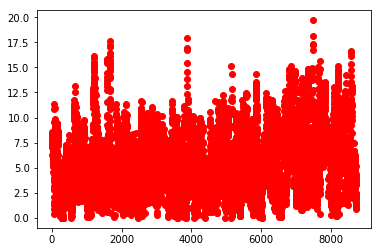

In [2]:
import numpy as np

# open the file folder
fp = r"data.txt"

# read the data
data = np.loadtxt(fp, delimiter=",")

# plot the data
from matplotlib import pyplot as plt
plt.plot(range(len(data)), data, 'ro')
plt.show()

In [3]:
# the length of time series
year = len(data)/24/365
print(year)

# print the result
print("The time series is 1 year")

# Let's break the data into several groups
maxi = max(data)
mini = min(data)

# the maximum and minimum
print(maxi)
print(mini)

0.9953196347031964
The time series is 1 year
19.7
0.0


In [4]:
# break them with the interval 4
# count the number of value in [0-4]
data_0_4 = data[(data >= 0) & (data <=4)]
data_4_8 = data[(data > 4) & (data <=8)]
data_8_12 = data[(data > 8) & (data <=12)]
data_12_16 = data[(data > 12) & (data <=16)]
data_16_20 = data[(data > 16) & (data <=20)]

# calculate the length of each group
len_0_4 = len(data_0_4)
len_4_8 = len(data_4_8)
len_8_12 = len(data_8_12)
len_12_16 = len(data_12_16)
len_16_20 = len(data_16_20)

# calculate the H(x)
H_4 = len_0_4 
H_8 = (H_4 + len_4_8)
H_12 = (H_8 + len_8_12)
H_16 = (H_12 + len_12_16)

In [5]:
H_all = [H_4,H_8,H_12,H_16]
H_all = [x / len(data) for x in H_all]
H_197 = len(data) / (len(data)+1)
H_all.append(H_197)

In [7]:
H_all

[0.345452460144512,
 0.7909163894942081,
 0.9691478380548229,
 0.9979355430668655,
 0.9998853211009174]

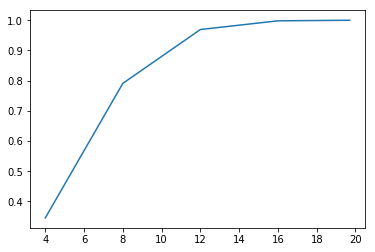

In [8]:
# plot the new figure
plt.plot([4,8,12,16,19.7], H_all)
plt.show()

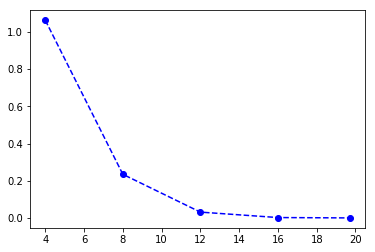

In [6]:
import math
log_H = [-1 * math.log(x) for x in H_all]
plt.plot([4,8,12,16,19.7], log_H, '--bo')
plt.show()

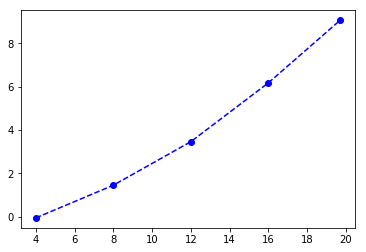

In [7]:
log_log_H = [-1 * math.log(x) for x in log_H]
plt.plot([4,8,12,16,19.7], log_log_H, '--bo')
plt.show()

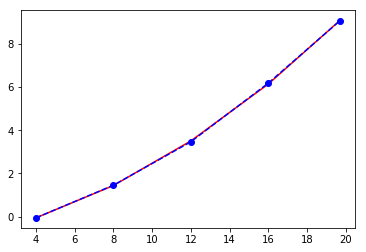

In [8]:
# fit the points as a polyfit
x = [4,8,12,16,19.7]
y = [-1 * math.log(x) for x in log_H]
z = np.polyfit(x, y, 2)
fit_fn = np.poly1d(z) 
plt.plot(x,fit_fn(x), 'r')
plt.plot(x, y, '--bo')
plt.show()

In [13]:
# inverse polyld
y0 = ( 365*8 + 366*2 ) * 24
y0 = y0 / (y0 +1)
y0 = -1 * math.log(y0)
y0 = -1 * math.log(y0)

x0 = (fit_fn - y0).roots

In [16]:
# print the result
print("The highest value is {0}" .format(x0[1]))

The highest value is 22.226884872885616
